# Implementation of ANN using Keras

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [3]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [6]:
(X_train_full, y_train_full) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_full[0].shape

(28, 28)

In [11]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000] / 255.,X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

#scale the test set as well
X_test = X_test / 255.

In [12]:
# TRAIN - 55000
# TEST - 10000
# VAL - 5000

In [13]:
len(X_train_full[5000:])

55000

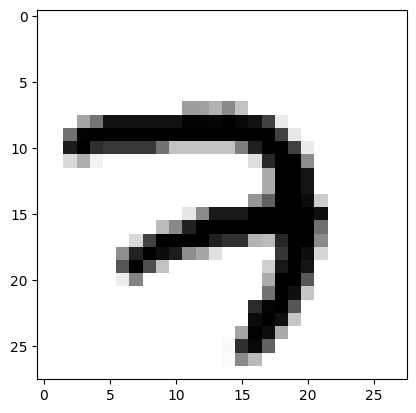

In [14]:
# Lets view some data

plt.imshow(X_train[0] , cmap = 'binary')
plt.show()

<Axes: >

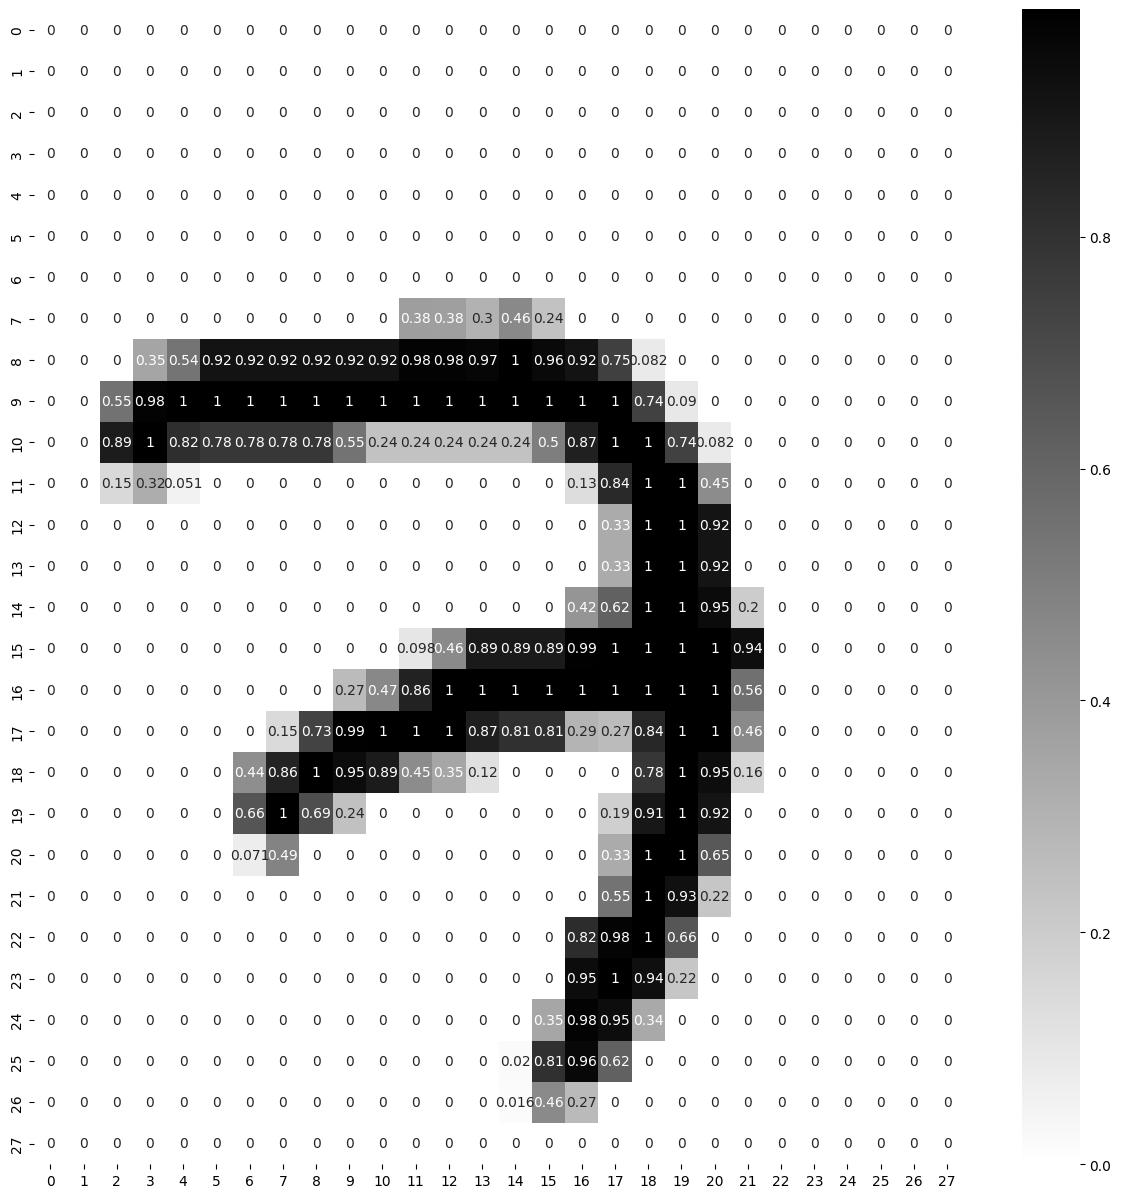

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0],annot = True , cmap = 'binary')

In [16]:
28*28

784

In [17]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 267,810
Trainable params: 267,210
Non-trainable params: 600
________________________________________________

In [20]:
# firstLayer * secondLayer + bias
784*300 + 300 , 300 * 100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [21]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [22]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [23]:
hidden1.get_weights()[0].shape

(784, 300)

In [24]:
hidden1.get_weights()[1].shape

(300,)

In [25]:
weights , biases = hidden1.get_weights()

In [26]:
weights.shape

(784, 300)

In [27]:
biases.shape

(300,)

In [28]:
print("shape\n", weights.shape , "\n")
weights

shape
 (784, 300) 



array([[ 0.0098301 ,  0.03410546,  0.0164053 , ...,  0.0170161 ,
        -0.01600721,  0.00159878],
       [-0.06652582, -0.06177733, -0.03012803, ...,  0.02760948,
         0.0275993 , -0.01854571],
       [ 0.05390064, -0.00227883,  0.02473966, ...,  0.06017366,
         0.01894681,  0.03362484],
       ...,
       [ 0.02335863, -0.00204947, -0.05847498, ..., -0.02458135,
         0.0102907 , -0.05172583],
       [-0.01489611,  0.03354701,  0.05494094, ...,  0.06510071,
        -0.04917871, -0.0062869 ],
       [ 0.004131  , -0.00609761, -0.03237254, ...,  0.06835054,
        -0.05550829,  0.01650146]], dtype=float32)

In [29]:
print("shape\n", biases.shape , "\n")
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [31]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3448 - accuracy: 0.8990 - val_loss: 0.1575 - val_accuracy: 0.9592
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1649 - accuracy: 0.9513 - val_loss: 0.1214 - val_accuracy: 0.9660
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1202 - accuracy: 0.9648 - val_loss: 0.1046 - val_accuracy: 0.9716
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9713 - val_loss: 0.0939 - val_accuracy: 0.9726
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9774 - val_loss: 0.0832 - val_accuracy: 0.9756
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.0770 - val_accuracy: 0.9770
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9837 - val_loss: 0.0737 - val_accurac

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.344781,0.898982,0.157502,0.9592
1,0.164911,0.951327,0.121396,0.9660
2,0.120189,0.964818,0.104612,0.9716
3,0.097738,0.971345,0.093876,0.9726
4,0.078587,0.977382,0.083203,0.9756
5,0.067400,0.980364,0.077030,0.9770
6,0.057906,0.983691,0.073688,0.9778
7,0.049548,0.985564,0.072516,0.9772
8,0.042079,0.988291,0.069862,0.9796
9,0.037606,0.989818,0.068948,0.9788


<Axes: >

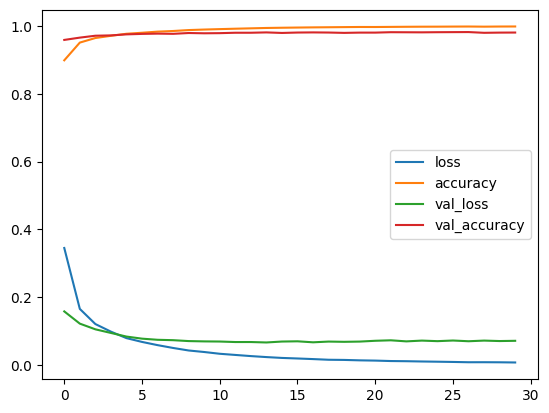

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9807


[0.06954868882894516, 0.9807000160217285]

# SAMPLE CHECK - TEST DATA

In [36]:
X_new  = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [37]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

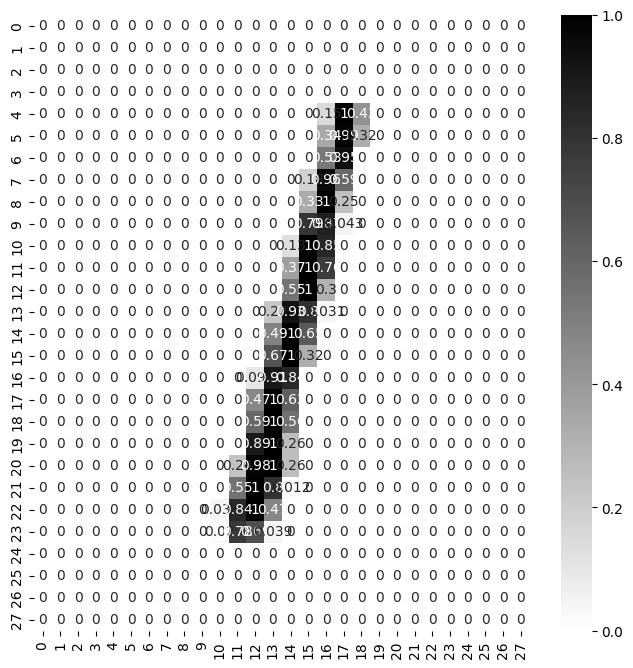

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2] , annot = True  ,cmap = 'binary')

In [39]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_prob

array([[3.3137873e-08, 5.8318847e-08, 3.8828803e-06, 4.7038333e-07,
        8.1820115e-09, 3.2816979e-07, 2.9169851e-09, 9.9999475e-01,
        8.2905345e-08, 3.9409491e-07],
       [4.8193041e-08, 3.9314067e-08, 9.9999988e-01, 1.3565700e-07,
        1.5627086e-11, 3.7093155e-09, 4.8217956e-08, 4.7331175e-12,
        2.1198185e-09, 4.0171512e-12],
       [1.5725735e-07, 9.9996960e-01, 4.6617033e-06, 3.8194298e-08,
        3.9003646e-07, 1.0799351e-05, 1.7565062e-06, 3.2577875e-06,
        9.2810515e-06, 5.5390888e-08]], dtype=float32)

In [41]:
y_pred = np.argmax(y_prob , axis = -1)

In [42]:
y_pred

array([7, 2, 1])

In [43]:
actual

array([7, 2, 1], dtype=uint8)

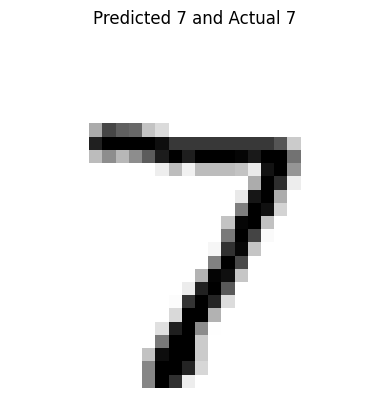

##################################################


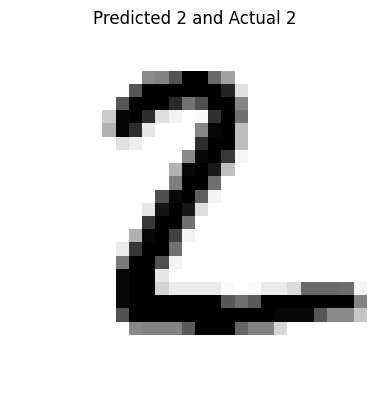

##################################################


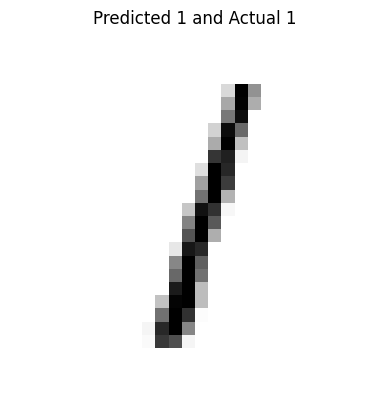

##################################################


In [44]:
# plot
for data , pred , actual_data in zip(X_new , y_pred , actual):
  plt.imshow(data,cmap='binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis('off')
  plt.show()
  print("#"*50)

In [45]:
#METHOD - 2 with regularization and dropout

In [46]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_regularizer= regularizers.l2(1e-4))) #lasso regularization
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_regularizer= regularizers.L1L2(l1=1e-5,l2=1e-4))) #elastic net regularization
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [48]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [49]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0326 - accuracy: 0.6794 - val_loss: 0.4281 - val_accuracy: 0.8930
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5497 - accuracy: 0.8415 - val_loss: 0.3190 - val_accuracy: 0.9194
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4473 - accuracy: 0.8735 - val_loss: 0.2706 - val_accuracy: 0.9290
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4005 - accuracy: 0.8886 - val_loss: 0.2442 - val_accuracy: 0.9402
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.9010 - val_loss: 0.2203 - val_accuracy: 0.9460
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.9080 - val_loss: 0.2069 - val_accuracy: 0.9476
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.9158 - val_loss: 0.1955 - val_accuracy:

# weight initialization

## intializer with zeros --- does not allow the model to train

In [50]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)               

In [53]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [54]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3017 - accuracy: 0.1119 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126


In [55]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.301682,0.111909,2.300928,0.1126
1,2.301301,0.112345,2.300891,0.1126
2,2.301300,0.112345,2.300887,0.1126
3,2.301308,0.112345,2.300855,0.1126
4,2.301308,0.112345,2.300988,0.1126


# GLOROT NORMAL INITIALIZER - SAME AS XAVIER INITIALIZER

In [57]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [59]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [60]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4343 - accuracy: 0.5153 - val_loss: 0.5609 - val_accuracy: 0.8586
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7141 - accuracy: 0.7779 - val_loss: 0.3444 - val_accuracy: 0.9128
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5533 - accuracy: 0.8342 - val_loss: 0.2866 - val_accuracy: 0.9238
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4790 - accuracy: 0.8582 - val_loss: 0.2414 - val_accuracy: 0.9348
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4238 - accuracy: 0.8743 - val_loss: 0.2158 - val_accuracy: 0.9402


In [61]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.434252,0.515255,0.560872,0.8586
1,0.714103,0.777855,0.344358,0.9128
2,0.553313,0.834164,0.286604,0.9238
3,0.478987,0.858164,0.241404,0.9348
4,0.423812,0.874291,0.215788,0.9402


<Axes: >

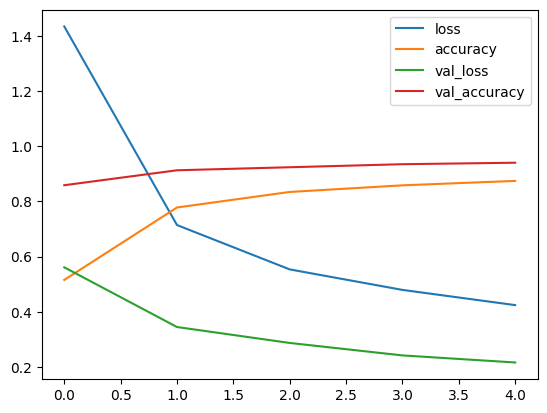

In [62]:
pd.DataFrame(history.history).plot()

# He weight initializer

In [63]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)               

In [65]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [66]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 2ms/step - loss: 1.2198 - accuracy: 0.5827 - val_loss: 0.4626 - val_accuracy: 0.8804
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6369 - accuracy: 0.7965 - val_loss: 0.2990 - val_accuracy: 0.9220
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5022 - accuracy: 0.8456 - val_loss: 0.2543 - val_accuracy: 0.9310
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8683 - val_loss: 0.2173 - val_accuracy: 0.9438
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3935 - accuracy: 0.8840 - val_loss: 0.1939 - val_accuracy: 0.9484


In [67]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.219795,0.582709,0.462591,0.8804
1,0.636860,0.796491,0.298955,0.9220
2,0.502249,0.845600,0.254266,0.9310
3,0.440097,0.868255,0.217298,0.9438
4,0.393504,0.884036,0.193885,0.9484


<Axes: >

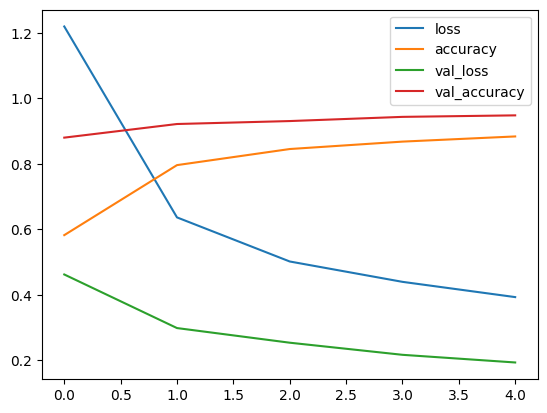

In [68]:
pd.DataFrame(history.history).plot()